In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
import numpy as np
import matplotlib.pyplot as plt
from atomrdf import KnowledgeGraph, System

In [3]:
project = 'sf6'
pr = Project(project)
kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

In [4]:
struct = pr.create.structure.annotated_structure.bulk('Cu')

In [5]:
refjob = pr.create.job.Lammps('reflmp')
refjob.structure = struct
refjob.potential = '2009--Mendelev-M-I--Cu-Zr--LAMMPS--ipr1'

In [6]:
phono = pr.create.job.PhonopyJob('phono')
phono.ref_job = refjob

In [7]:
quasi = pr.create.job.QuasiHarmonicJob('quasi')
quasi.ref_job = phono

In [8]:
quasi.input["temperature_end"] = 500
quasi.input["temperature_steps"] = 2
quasi.input["axes"]=["x","y","z"]
quasi.input["strains"] = None

In [9]:
quasi.run()

2024-06-06 14:26:23,074 - pyiron_log - WARNING - The job quasi is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [10]:
kg.add_workflow(quasi, workflow_environment='pyiron')

/home/srmnitc/miniconda3/envs/workflow-rdf/lib/python3.11/site-packages/atomrdf/graph.py:376: UserWarning: asmo:hasValue has a range with unspecified datatype!
  warnings.warn(f"{triple[1].name} has a range with unspecified datatype!")


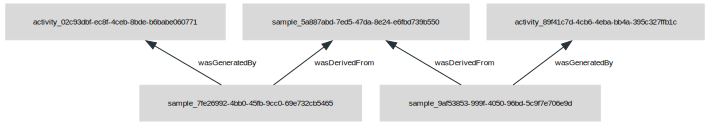

In [11]:
kg.visualise(sample_view=True, layout='dot')

In [12]:
kg.samples

[sample:5a887abd-7ed5-47da-8e24-e6fbd739b550,
 sample:7fe26992-4bb0-45fb-9cc0-69e732cb5465_from_sample:5a887abd-7ed5-47da-8e24-e6fbd739b550,
 sample:c451e722-b2da-4397-a9de-fdc0f85d8ff3,
 sample:9af53853-999f-4050-96bd-5c9f7e706e9d_from_sample:5a887abd-7ed5-47da-8e24-e6fbd739b550]

In [14]:
sample = kg.samples[-1]

In [22]:
import unicodedata
import json

In [27]:
c = sample.outputs.QuasiHarmonicTemperature.value

In [29]:
c[0]

'['

In [23]:
json.loads(sample.outputs.QuasiHarmonicTemperature.value)

[0.0, 500.0]

In [26]:
json.loads(sample.outputs.QuasiHarmonicFreeEnergy.value)

[[0.1414,
  0.139,
  0.136,
  0.1328,
  0.1292,
  0.1255,
  0.123,
  0.1207,
  0.1186,
  0.117,
  0.1155],
 [-0.3276,
  -0.3361,
  -0.3475,
  -0.3609,
  -0.3764,
  -0.3934,
  -0.4066,
  -0.4186,
  -0.4302,
  -0.4392,
  -0.4467]]

In [22]:
from atomrdf.namespace import CMSO, ASMO

In [19]:
inps = [k[2] for k in kg.triples((sample._sample_id, CMSO.hasCalculatedProperty, None))]

In [23]:
term = inps[2]

In [33]:
val = sample._graph.value(term, ASMO.hasValue)

In [34]:
val

rdflib.term.Literal('[0.]')

In [35]:
vx = val.toPython()

In [38]:
vx[-1]

']'

In [27]:
import re
from ast import literal_eval

In [28]:
val = re.sub("\s+", ",", val)

In [30]:
val = literal_eval(val)

In [31]:
np.array(val)

array([0.])